In [ ]:
#Pip install XGBoost, CatBoost, LightGBM

In [ ]:
!pip install xgboost

In [ ]:
!pip install catboost

In [ ]:
!pip install lightgbm

# Example 1: XGBoost with Iris Dataset

In [18]:

# Imports
from sklearn.datasets import load_iris
from xgboost import XGBClassifier
import pandas as pd
import numpy as np

# Load Data
iris = load_iris()

# Create a dataframe
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target

# Let's see a sample of created df
df.sample(frac=0.01)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
8,4.4,2.9,1.4,0.2,0
0,5.1,3.5,1.4,0.2,0


In [19]:
# Let's see target names
targets = iris.target_names
print(targets)
['setosa' 'versicolor' 'virginica']
# Prepare training data for building the model
X_train = df.drop(['target'], axis=1).values
y_train = df['target']

# Instantiate the model
cls = XGBClassifier()

# Train/Fit the model 
cls.fit(X_train, y_train)

# Make prediction using the model
X_pred = [5.1, 3.2, 1.5, 0.5]
y_pred = cls.predict([X_pred])

print("Prediction is: {}".format(targets[y_pred]))

['setosa' 'versicolor' 'virginica']
Prediction is: ['setosa']


# Example 2: Implementing Other Boosting Algorithms Using Synthetic Data

In [ ]:
#1. Gradient Boosting

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score #(coefficient of determination) regression score function

X, y = make_regression(n_samples=100,n_features=10,n_informative=5,n_targets=1,random_state=42)
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.2)
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred1 = gbr.predict(X_test)
print("Gradient Boosting - R2: ",r2_score(y_test, y_pred1))


Gradient Boosting - R2:  0.866636749631108


In [ ]:
#2. XGBoost

In [21]:
from xgboost import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
y_pred2 = xgr.predict(X_test)
print("XGBoost - R2: ",r2_score(y_test, y_pred2))


XGBoost - R2:  0.7744789425936901


In [ ]:
#3. AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostRegressor
adr = AdaBoostRegressor()
adr.fit(X_train, y_train)
y_pred3 = adr.predict(X_test)
print("AdaBoost - R2: ",r2_score(y_test, y_pred3))


AdaBoost - R2:  0.7460450002346022


In [ ]:
#4. CatBoost

In [23]:
from catboost import CatBoostRegressor
cbr = CatBoostRegressor(iterations=100,depth=5,learning_rate=0.01,loss_function='RMSE',verbose=0)
cbr.fit(X_train, y_train)
y_pred4 = cbr.predict(X_test)
print("CatBoost - R2: ",r2_score(y_test, y_pred4))


CatBoost - R2:  0.42391567923792006


In [ ]:
#5. LightGBM

In [24]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
lgr = LGBMRegressor()
lgr.fit(X_train, y_train)
y_pred5 = lgr.predict(X_test)
print("LightGBM - R2: ",r2_score(y_test, y_pred5))


LightGBM - R2:  0.7967087059956381


Text(0, 0.5, 'y_pred')

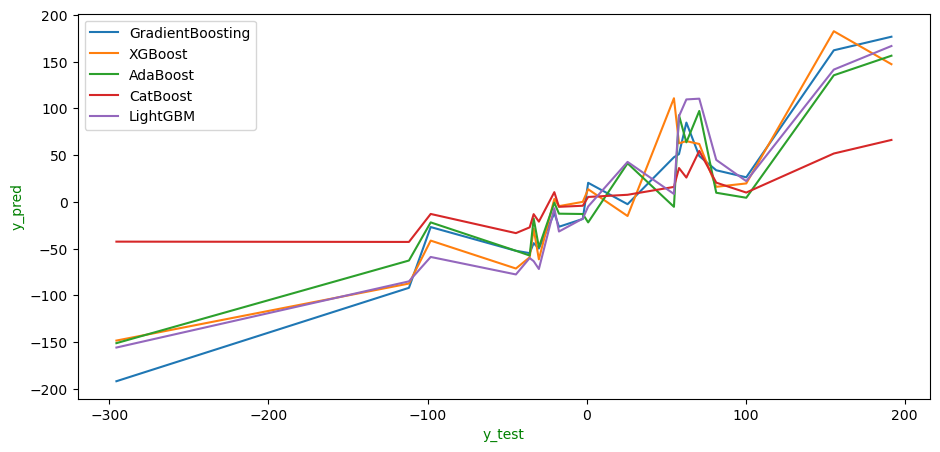

In [25]:
#Plot and compare performance curves

import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(11, 5))

ax = sns.lineplot(x=y_test, y=y_pred1,label='GradientBoosting')
ax1 = sns.lineplot(x=y_test, y=y_pred2,label='XGBoost')
ax2 = sns.lineplot(x=y_test, y=y_pred3,label='AdaBoost')
ax3 = sns.lineplot(x=y_test, y=y_pred4,label='CatBoost')
ax4 = sns.lineplot(x=y_test, y=y_pred5,label='LightGBM')

ax.set_xlabel('y_test', color='g')
ax.set_ylabel('y_pred', color='g')
